c:\Users\Hubola\Desktop\assignment1\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


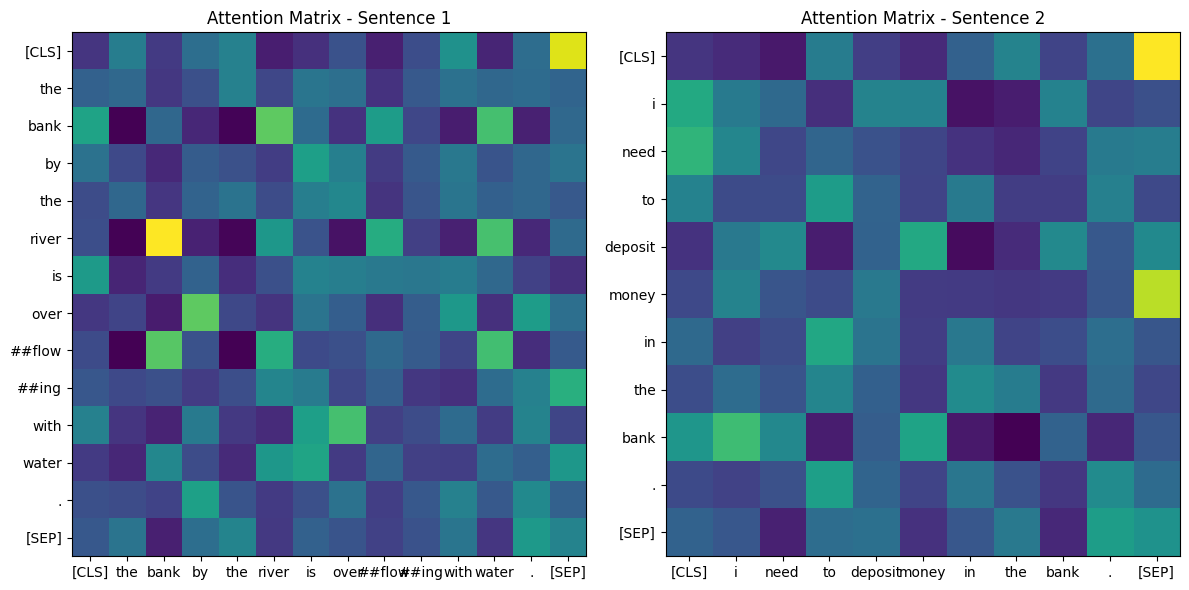

In [3]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import numpy as np

sentence1 = "The bank by the river is overflowing with water."
sentence2 = "I need to deposit money in the bank."

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

with torch.no_grad():
    outputs1 = model(**inputs1)
    outputs2 = model(**inputs2)

attentions1 = outputs1.attentions
attentions2 = outputs2.attentions

attention1 = attentions1[0][0, 0, :, :].detach().numpy()
attention2 = attentions2[0][0, 0, :, :].detach().numpy()

tokens1 = tokenizer.tokenize(tokenizer.decode(inputs1['input_ids'][0]))
tokens2 = tokenizer.tokenize(tokenizer.decode(inputs2['input_ids'][0]))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(attention1, cmap='viridis', aspect='auto')
axes[0].set_xticks(np.arange(len(tokens1)))
axes[0].set_yticks(np.arange(len(tokens1)))
axes[0].set_xticklabels(tokens1)
axes[0].set_yticklabels(tokens1)
axes[0].set_title('Attention Matrix - Sentence 1')

axes[1].imshow(attention2, cmap='viridis', aspect='auto')
axes[1].set_xticks(np.arange(len(tokens2)))
axes[1].set_yticks(np.arange(len(tokens2)))
axes[1].set_xticklabels(tokens2)
axes[1].set_yticklabels(tokens2)
axes[1].set_title('Attention Matrix - Sentence 2')

plt.tight_layout()
plt.show()